In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

#### Load dataset

In [33]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

df = pd.read_csv(url)

df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Question 1

Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [7]:
# display data types of each col
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.

In [9]:
df.describe().round(2)

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,2.161300e+04,21613.00,21600.00,21603.00,21613.00,21613.00,21613.00,21613.00,21613.00,...,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,10806.00,4.580302e+09,540088.14,3.37,2.12,2079.90,15106.97,1.49,0.01,0.23,...,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,6239.28,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,...,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,0.00,1.000102e+06,75000.00,1.00,0.50,290.00,520.00,1.00,0.00,0.00,...,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,5403.00,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,...,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,10806.00,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,...,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,16209.00,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,...,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,21612.00,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,...,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


# Module 2: Data Wrangling

### Question 2

Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Make sure the <code>inplace</code> parameter is set to <code>True</code>. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 

In [35]:
# Drop column
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

# statistical summary
df.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21600.00,21603.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.12,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,75000.00,1.00,0.50,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


We can see we have missing values for the columns  bedrooms and  bathrooms 

In [36]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10



We can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace(). Don't forget to set the inplace parameter to True

In [37]:
# replace missing value with the mean
mean_bedroom = df['bedrooms'].mean()

df['bedrooms'].replace(np.nan, mean_bedroom, inplace=True)

In [39]:
# replace missing value with the mean
mean_bathrooms = df['bathrooms'].mean()

df['bathrooms'].replace(np.nan, mean_bathrooms, inplace=True)

In [41]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis

### Question 3

Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 

In [48]:
df[['floors']].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4

Use the function __boxplot__ in the seaborn library to determine whether houses with a __waterfront__ view or without a waterfront view have more __price__ outliers. Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project.

<Axes: xlabel='waterfront', ylabel='price'>

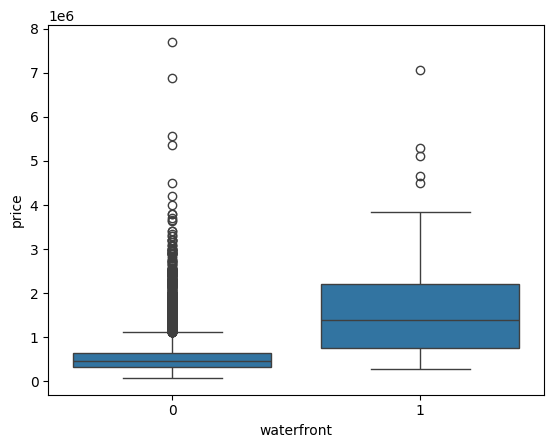

In [51]:
# box plot
sns.boxplot(data=df, x='waterfront', y='price')

### Question 5

Use the function regplot in the seaborn library to determine if the feature __sqft_above__ is negatively or positively correlated with __price__. Take a screenshot of your code and __scatterplot__. You will need to submit the screenshot for the final project.

(0.0, 8081250.0)

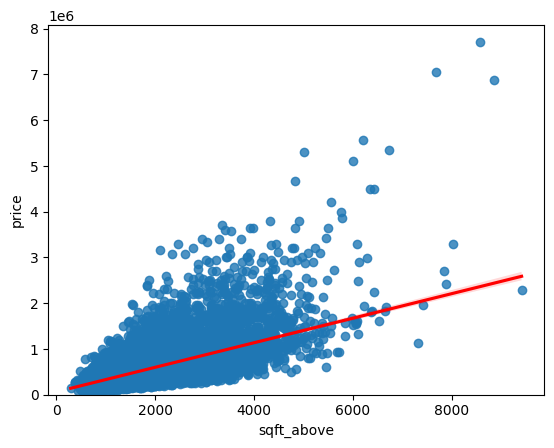

In [59]:
# Scatter plot
sns.regplot(data=df, x='sqft_above', y='price', line_kws={"color": "red"})
plt.ylim(0,)

<i>The `sqft_above` is __positively__ correlated with the price</i>


We can use the Pandas method corr() to find the feature other than price that is most correlated with price.

In [58]:
# df correlation
df.select_dtypes(include=[np.number, np.float64]).corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Module 4: Model Development

We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.

In [60]:
X = df[['long']]
Y = df['price']

lm = LinearRegression()
lm.fit(X, Y)  

lm.score(X, Y)

0.00046769430149007363

### Question  6

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [61]:
lm = LinearRegression()

X = df[['sqft_living']]
Y = df['price']

# fit the model
lm.fit(X, Y)

# Predict
yhat = lm.predict(X)

# R^2 score
lm.score(X, Y)

0.4928532179037931

### Question 7

Fit a linear regression model to predict the <code>'price'</code> using the list of features:

In [64]:
lm = LinearRegression()

features = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y = df['price']

# fit
lm.fit(features, Y)

# predict
yhat = lm.predict(features)

# R^2 score
lm.score(features, Y)

0.6576950776755857

### This will help with Question 8

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [65]:
features = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y = df['price']

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

pipe = Pipeline(Input)
features = features.astype(float)

# fit
pipe.fit(features, Y)

yPipe = pipe.predict(features)    # predict

# R^2 score
r2_score(Y, yPipe)

0.7513110422049437

# Module 5: Model Evaluation and Refinement

We will split the data into training and testing sets:

In [66]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Question 9

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [70]:
RR = Ridge(alpha=0.1) 

RR.fit(x_train, y_train)
yhat = RR.predict(x_test)

r2_score(y_test, yhat)

0.6478759163939114

### Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.

In [72]:
pF = PolynomialFeatures(degree=2)
RR = Ridge(alpha=0.1)

x_train_pF = pF.fit_transform(x_train)
x_test_pF = pF.fit_transform(x_test)

RR.fit(x_train_pF, y_train)
yhat = RR.predict(x_test_pF)

r2_score(y_test, yhat)

0.7002744275402134